In [15]:
from PIL import Image
from skimage import exposure, io
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [25]:
df = pd.read_csv("dataset/name_images.csv", index_col=0)

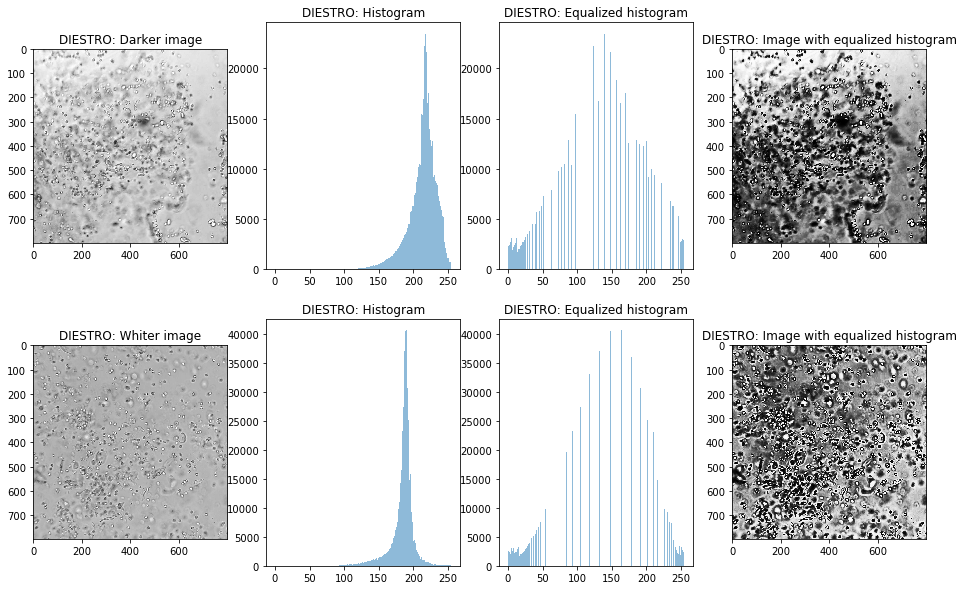

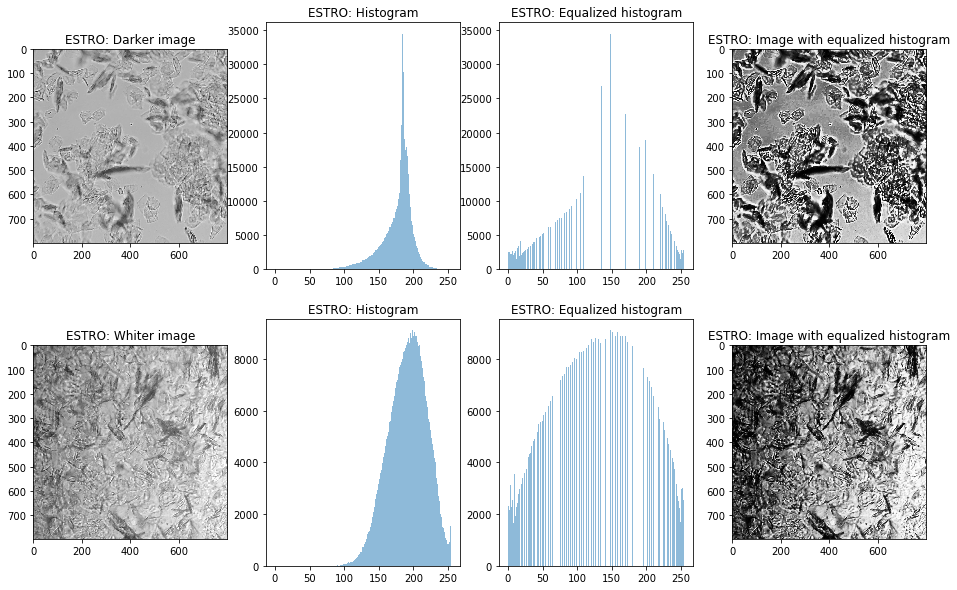

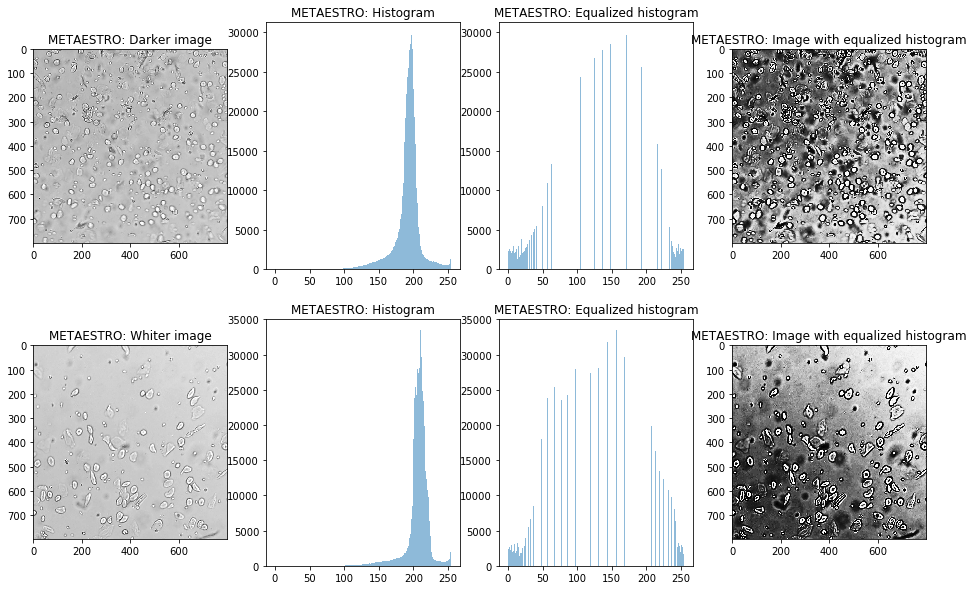

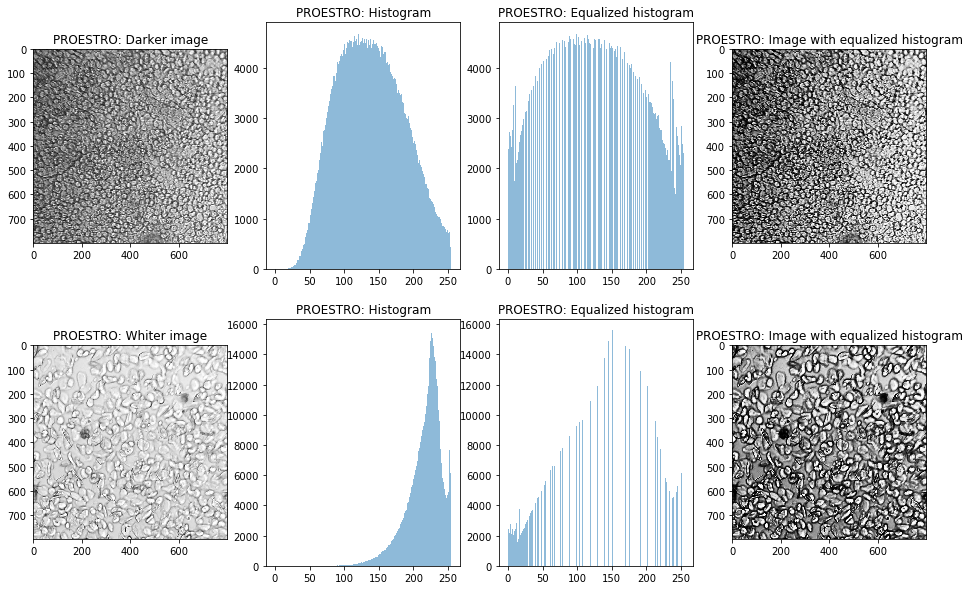

In [87]:
plt.rcParams['figure.figsize'] = [16, 10]
for label in df.label.unique():
    cells = df[df.label == label]
    images = [(io.imread(filename, as_gray=True) * 255).astype(np.uint8) for filename in cells.filename.values]
    mean = np.array([image.mean() for image in images])
    
    darker_image = images[means.argmin()]
    darker_image_eq = (exposure.equalize_hist(darker_image) * 255).astype(np.uint8)
    whiter_image = images[means.argmax()]
    whiter_image_eq = (exposure.equalize_hist(whiter_image) * 255).astype(np.uint8)

    bins = np.linspace(0, 255, 256)
    plt.subplot(2, 4, 1)
    plt.title("{}: Darker image".format(label))
    plt.imshow(Image.fromarray(darker_image), cmap = 'gist_gray')
    
    plt.subplot(2, 4, 2)
    plt.title("{}: Histogram".format(label))
    plt.hist(darker_image.reshape(-1), bins, alpha=0.5);
    
    plt.subplot(2, 4, 3)
    plt.title("{}: Equalized histogram".format(label))
    plt.hist(darker_image_eq.reshape(-1), bins, alpha=0.5);
    
    plt.subplot(2, 4, 4)
    plt.title("{}: Image with equalized histogram".format(label))
    plt.imshow(Image.fromarray(darker_image_eq), cmap = 'gist_gray');
#--------------------------------------------------------------------------
    plt.subplot(2, 4, 5)
    plt.title("{}: Whiter image".format(label))
    plt.imshow(Image.fromarray(whiter_image), cmap = 'gist_gray');
    
    plt.subplot(2, 4, 6)
    plt.title("{}: Histogram".format(label))
    plt.hist(whiter_image.reshape(-1), bins, alpha=0.5);
    
    plt.subplot(2, 4, 7)
    plt.title("{}: Equalized histogram".format(label))
    plt.hist(whiter_image_eq.reshape(-1), bins, alpha=0.5);
    
    plt.subplot(2, 4, 8)
    plt.title("{}: Image with equalized histogram".format(label));
    plt.imshow(Image.fromarray(whiter_image_eq), cmap = 'gist_gray');
    
    plt.show()